<div style="text-align: center">
    <img src="https://github.com/xCDAT/xcdat/raw/main/docs/_static/xcdat_logo.png" alt="xCDAT logo" style="display: inline-block; width:450px;">
</div>


# A Gentle Introduction to xCDAT (Xarray Climate Data Analysis Tools)

<h3 style="text-align: left;">
    "A Python package for simple and robust climate data analysis."</h2>
<h3 style="text-align: left; font-style:italic">Core Developers: Tom Vo, Stephen Po-Chedley, Jason Boutte, Jill Zhang, Jiwoo Lee</h3>

---
<p style="text-align: left;">With thanks to Peter Gleckler, Paul Durack, Karl Taylor, and Chris Golaz</p>


_This work is performed under the auspices of the U. S. DOE by Lawrence Livermore National Laboratory under contract No. DE-AC52-07NA27344._

In [47]:
# This style import is necessary to properly render Xarray's HTML output with Jupyer RISE extension.
# GitHub Issue: https://github.com/damianavila/RISE/issues/594
# Source: https://github.com/smartass101/xarray-pydata-prague-2020/blob/main/rise.css

from IPython.core.display import HTML

style = """
<style>
.reveal pre.xr-text-repr-fallback {
    display: none;
}

.reveal ul.xr-sections {
    display: grid
}

.reveal ul ul.xr-var-list {
    display: contents
}
</style>
"""

HTML(style)

## Presentation Overview

Intended audience: Some or no familiarity with `xarray` and `xcdat`

* What is xCDAT?
* An overview of Xarray
* How does xCDAT fit in the Xarray ecosystem?
* The API design of xCDAT
* Demo of xCDAT capabilities
* Wrap up and resources


## What is xCDAT?

* xCDAT is an **extension of xarray** for **climate data analysis on structured grids**.
* The goal is to provide **generalizable features and utilities for simple and robust analysis of climate data**.
* Jointly developed by scientists and developers from **E3SM** and **PCMDI** at **Lawrence Livermore National Lab**, in collaboration with external users and organizations (e.g., IPSL)
* Performed for the E3SM and **SEATS** (Simplifying ESM Analysis Through Standards) projects

<div style="text-align: center">
<img src="https://e3sm.org/wp-content/uploads/2019/05/E3SM_Logo.jpg" alt="E3SM logo" style="display: inline-block; width:300px;">
<img src="https://pcmdi.llnl.gov/Data/media/images/220224_durack1_PCMDILogoWithText-trim-940Wpx-png8.png" alt="PCMDI logo" style="display: inline-block; width:300px;">
<img src="https://www.seatstandards.org/SEATSlogo.png" alt="SEATS logo" style="display: inline-block; width:300px;">

</div>

* Some key xCDAT features are inspired by or ported from the core **CDAT** library, while others **leverage powerful libraries** in the **xarray ecosystem** (e.g., xESMF and cf_xarray)
* xCDAT strives to support **CF compliant datasets** and datasets with **common non-CF compliant metadata** (e.g., time units in “months since …” or “years since …”)

<div style="text-align: center">
        <img src="https://esgf-index1.ceda.ac.uk/site_media/logos/WCRP-CMIP6_540x100.png" alt="CMIP6 logo" style="display: inline-block; width:450px">
    <img src="https://cf-xarray.readthedocs.io/en/latest/_images/full-logo.png" alt="cf-xarray logo" style="display: inline-block; width:450px
;">

</div>


## First, Let's Dive into Xarray

* Xarray is an evolution of an internal tool developed at The Climate Corporation
* Released as open source ina May 2014
* **NumFocus** fiscally sponsored project since August 2018


<div style="text-align: center">
    <img src="https://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" alt="xarray logo" style="display: inline-block; width:300px;">
    <img src="https://xarray.dev/NumFOCUS_sponsored_project_logo.svg" alt="NumFOCUS logo" style="display: inline-block; width:300px">
</div>



### Key Features and Capabilities in Xarray

* __“N-D labeled arrays and datasets in Python”__
    * Built upon and extends NumPy and pandas
    * Supports I/O for netCDF, Iris, OPeNDAP, Zarr, and GRIB.
* __Interoperable with scientific Python ecosystem__ including NumPy, Dask, Pandas, and Matplotlib
* Supports file I/O, indexing and selecting, interpolating, grouping, aggregating, __parallelism (Dask)__, plotting (matplotlib wrapper)

<div style="text-align: center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/2560px-NumPy_logo_2020.svg.png" alt="NumPy logo" style="display: inline-block; width:200px;">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" alt="Pandas logo" style="display: inline-block; width:200px;">
    <img src="https://docs.dask.org/en/stable/_images/dask_horizontal.svg" alt="Dask logo" style="display: inline-block; width:200px">
</div>

Source: <cite>https://xarray.dev/#features</cite>


### Why Xarray?

> "Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like 
> multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer 
> experience."
>
> &mdash; <cite> https://xarray.pydata.org/en/v2022.10.0/getting-started-guide/why-xarray.html</cite>



Xarray uses labels on arrays to provide a powerful and concise interface

  * __Apply operations over dimensions by name__
    * `x.sum('time')`
  * __Select values by label__ (or logical location) instead of integer location
    * `x.loc['2014-01-01']` or `x.sel(time='2014-01-01')`
  * __Mathematical operations vectorize across multiple dimensions__ (array broadcasting) based on __dimension names__, not shape
    * `x - y`
  * Easily use the __split-apply-combine paradigm__ with groupby
    * `x.groupby('time.dayofyear').mean()`.
  * __Database-like alignment__ based on coordinate labels that __smoothly handles missing values__
    * `x, y = xr.align(x, y, join='outer')`
  * Keep track of __arbitrary metadata in__ the form of a __Python dictionary__
    * `x.attrs

Source: <cite>https://docs.xarray.dev/en/v2022.10.0/getting-started-guide/why-xarray.html#what-labels-enable</cite>

## The Xarray Core Data Structures

> "Xarray data models are borrowed from netCDF file format, which provides xarray with a natural and portable
> serialization format."
>
> &mdash; <cite>https://docs.xarray.dev/en/v2022.10.0/getting-started-guide/why-xarray.html</cite>

* Xarray has two core data structures, which build upon and extend the core strengths of NumPy and pandas. 


1. `xarray.DataArray` 
  * A class that attaches __dimension names__, __coordinates__, and __attributes__ to __multi-dimensional arrays__ (aka "labeled arrays")
  * An N-D generalization of a `pandas.Series`
  
2. `xarray.Dataset` 
  * A __dictionary-like container__ of DataArray objects with __aligned dimensions__ 
      * DataArray objects are classified as "coordinate variables" or "data variables"
      * Shared __union__ of coordinates for all data variables
  * Serves a similar purpose to a `pandas.DataFrame`
  

<div style="text-align: center">
    <img src="https://docs.xarray.dev/en/stable/_images/dataset-diagram.png" alt="xarray logo" style="display: inline-block; width:35%">
</div>

### Dissecting Xarray Data Models in a Real-World Dataset

This example netCDF4 dataset is opened directly from ESGF using xarray's OPeNDAP support.

It contains the __`tas` variable__, which represents near-surface air temperature.
`tas` is recorded on a monthly frequency.

In [45]:
import xarray as xr

filepath = "http://esgf.nci.org.au/thredds/dodsC/master/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"

ds = xr.open_dataset(filepath)

### The `Dataset` Model

A dictionary-like container of labeled arrays (DataArray objects) with aligned dimensions. 

Key properties:

* `dims`: a dictionary mapping from dimension names to the fixed length of each dimension (e.g., {'x': 6, 'y': 6, 'time': 8})
* `coords`: another dict-like container of DataArrays intended to label points used in data_vars (e.g., arrays of numbers, datetime objects or strings)
* `data_vars`: a dict-like container of DataArrays corresponding to variables
* `attrs`: dict to hold arbitrary metadata

Source: <cite>https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset</cite>

In [42]:
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.10.5
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

### The `DataArray` Model

Key properties:

* `values`: a numpy.ndarray holding the array’s values
* `dims`: dimension names for each axis (e.g., ('x', 'y', 'z'))
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: dict to hold arbitrary metadata (attributes)


Source: <cite>https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray</cite>

In [43]:
ds.tas

<xarray.DataArray 'tas' (time: 1980, lat: 145, lon: 192)>
[55123200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]

## Resources for Learning Xarray

* Now that you have a general sense of xarray data models, give xarray a shot if you haven't already!

* Here are some highly recommended resources:
  * [Xarray Tutorial](https://tutorial.xarray.dev/intro.html)
  * ["Xarray in 45 minutes"](https://tutorial.xarray.dev/overview/xarray-in-45-min.html#) 
  * [Xarray Documentation](https://docs.xarray.dev/en/stable/index.html)
  * [Xarray API Reference](https://docs.xarray.dev/en/stable/api.html)

## Jumping Forward to xCDAT, an Extension of Xarray

> "Xarray is designed as a general purpose library, and hence tries to avoid including overly domain specific
> functionality. But inevitably, the need for more domain specific logic arises."
>
> &mdash; https://docs.xarray.dev/en/v2022.10.0/internals/extending-xarray.html#extending-xarray

* xCDAT aims to provide **generalizable features and utilities for simple and robust analysis of climate data**.
* xCDAT's design philosophy is focused on **reducing the overhead required to accomplish certain tasks in xarray**.

### Available xCDAT Features

* Extension of xarray's ``open_dataset()`` and ``open_mfdataset()`` with post-processing options

  * Generate bounds that don't exist
  * Keep a single data variable in the Dataset
  * Optional decoding of time coordinates, centering of time coordinates, swapping longitudinal axis orientation between [0, 360) and [-180, 180)
* Temporal averaging
  * Time series averages (single snapshot and grouped), climatologies, and departures
  * Weighted or unweighted
  * Optional seasonal configuration (e.g., DJF vs. JFD, custom seasons)
* Geospatial weighted averaging (rectilinear grid)
  * Optional specification of regional domain
* Horizontal structured regridding (rectilinear and curvilinear grids)
  * Python implementation of `regrid2`_ for handling cartesian latitude longitude grids
  * API that wraps `xESMF`

## xCDAT's API Design

xCDAT provides public APIs in two ways:

1. Top-level APIs functions 

  * Example: `xcdat.open_dataset()`, `xcdat.center_times()`
  
2. Accessor classes

  * xcdat provides `Dataset` accessors, which are __implicit namespaces for custom functionality__.
  * Accessor __namespaces__ clearly identifies __separation from built-in xarray methods__. 
  * Example: `ds.spatial`, `ds.temporal`, `ds.regridder`



<div style="text-align: center">
    <figure>
    <img src="https://xcdat.readthedocs.io/en/latest/_images/accessor_api.svg" alt="xcdat accessor" style="display: inline-block; width:50%">
        <figcaption>xcdat spatial functionality is exposed by chaining the <span style="background-color: #e4e6e8">.spatial</span> accessor attribute to the <span style="background-color: #e4e6e8">xr.Dataset</span> object.</figcaption>
    </figure>
</div>



## A Demo of xCDAT Capabilities

* Prerequisites
    * Installing `xcdat`
    * Import `xcdat`
    * Open a dataset and apply postprocessing operations
* Scenario 1 - Calculate the spatial averages over the tropical region
* Scenario 2 - Calculate the annual anomalies
* Scenario 3 - Horizontal regridding (bilinear, gaussian grid)

### Installing `xcdat`

* xCDAT is available on Anaconda under the `conda-forge` channel.
  * https://anaconda.org/conda-forge/xcdat
* Two ways to install `xcdat` with recommended dependencies (`xesmf`)
  1. Create a conda environment from scratch (`conda create`)
    ```bash
    conda create -n <ENV_NAME> -c conda-forge xcdat xesmf
    conda activate <ENV_NAME>
    ```
  2. Install `xcdat` in an existing conda environment (`conda install`)
    ```bash
    conda activate <ENV_NAME>
    conda install -c conda-forge xcdat xesmf
    ```

_Source_: <cite>https://xcdat.readthedocs.io/en/latest/getting-started.html</cite>

### Opening a dataset

This example netCDF4 dataset is opened directly from ESGF using xarray's OPeNDAP support.

It contains the __`tas` variable__, which represents near-surface air temperature.
`tas` is recorded on a monthly frequency.

In [4]:
# This gives access to all xcdat public top-level APIs and accessor classes.
import xcdat as xc

# We import these packages specifically for plotting. It is not required to use xcdat.
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
filepath = "http://esgf.nci.org.au/thredds/dodsC/master/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"

ds = xc.open_dataset(
    filepath,
    add_bounds=True,
    decode_times=True,
    center_times=True
)

# Unit adjustment from Kelvin to Celcius
ds["tas"] = ds.tas - 273.15

In [6]:
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 -27.19 -27.19 -27.19 ... -25.29 -25.29
Attributes: (12/49)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.10.5
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

### Scenario 1: Spatial Averaging

Related accessor: `ds.spatial`

In this example, we calculate the spatial average of `tas` over the tropical region.

In [7]:
ds_trop_avg = ds.spatial.average("tas", axis=["X","Y"], lat_bounds=(-25,25))

In [8]:
ds_trop_avg.tas

<xarray.DataArray 'tas' (time: 1980)>
array([25.24722608, 25.61795924, 25.96516235, ..., 26.79536823,
       26.67771602, 26.27182383])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    height   float64 2.0

#### Plot the first 100 time steps

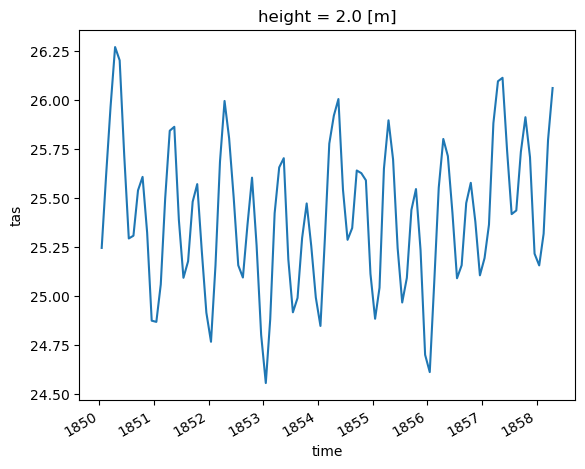

In [9]:
# Plot the first 100 time steps
ds_trop_avg.tas.isel(time=slice(0, 100)).plot()

### Scenario 2: Calculate temporal average 

Related accessor: `ds.temporal`

In this example, we calculate the temporal average of `tas` as a single snapshot. The time dimension is removed after averaging.

In [10]:
ds_avg = ds.temporal.average("tas", weighted=True)
ds_avg.tas

<xarray.DataArray 'tas' (lat: 145, lon: 192)>
array([[-48.01481628, -48.01481628, -48.01481628, ..., -48.01481628,
        -48.01481628, -48.01481628],
       [-44.94085363, -44.97948214, -45.01815398, ..., -44.82408252,
        -44.86273067, -44.9009281 ],
       [-44.11875274, -44.23060624, -44.33960158, ..., -43.76766492,
        -43.88593717, -44.00303006],
       ...,
       [-18.21076615, -18.17513373, -18.13957458, ..., -18.32720478,
        -18.28428828, -18.2486193 ],
       [-18.50778243, -18.49301854, -18.47902819, ..., -18.55410851,
        -18.5406963 , -18.52413098],
       [-19.07366375, -19.07366375, -19.07366375, ..., -19.07366375,
        -19.07366375, -19.07366375]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0
Attributes:
    operation:  temporal_avg
    mode:       average
    freq:       month
    weighted:   True

#### Plot the temporal average

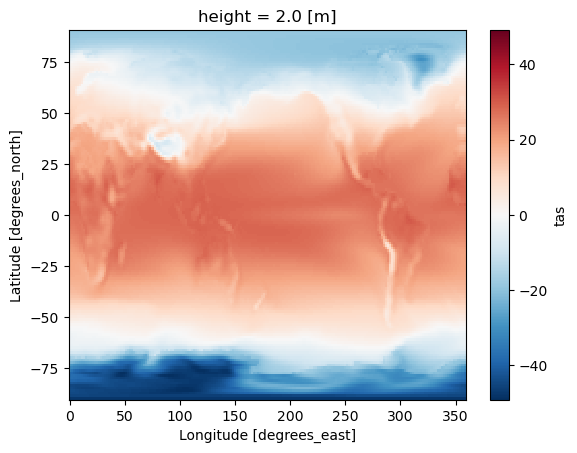

In [11]:
ds_avg.tas.plot(label="weighted")

### Scenario 3: Horizontal Regridding

Related accessor: `ds.regridder`

In this example, we will generate a gaussian grid with 32 latitudes to regrid our input data to.

#### Create the output grid

In [12]:
output_grid = xc.create_gaussian_grid(32)

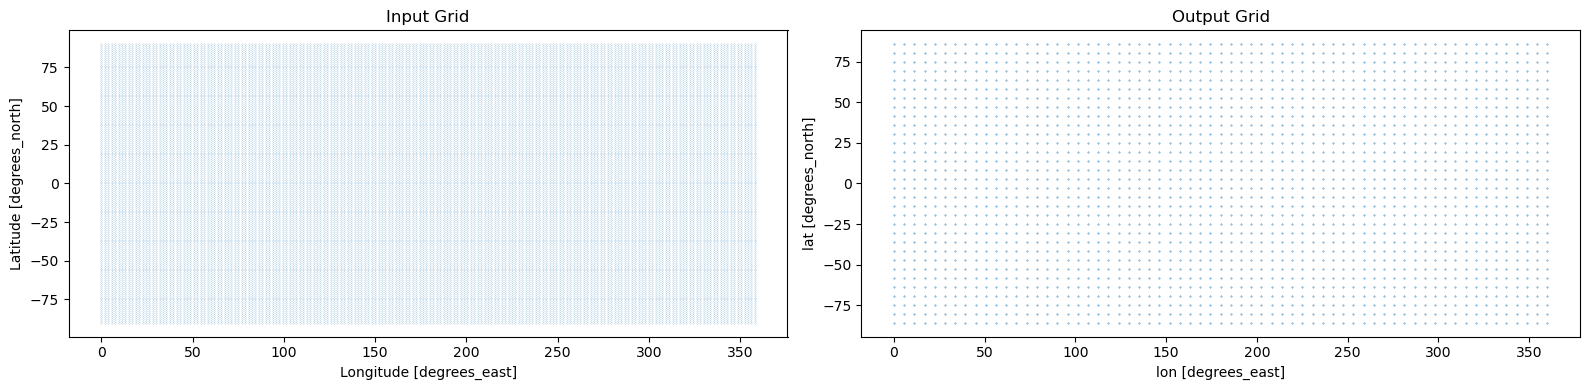

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ds.regridder.grid.plot.scatter('lon', 'lat', s=0.01, ax=axes[0])
axes[0].set_title('Input Grid')

output_grid.plot.scatter('lon', 'lat', s=0.1, ax=axes[1])
axes[1].set_title('Output Grid')

plt.tight_layout()

#### Regrid the data

xCDAT offers horizontal regridding with `xESMF` (default) and a Python port of `regrid2`.
We will be using `xESMF` to regrid.


In [14]:
# xesmf supports "bilinear", "conservative", "nearest_s2d", "nearest_d2s", and "patch"
output = ds.regridder.horizontal('tas', output_grid, tool='xesmf', method='bilinear')

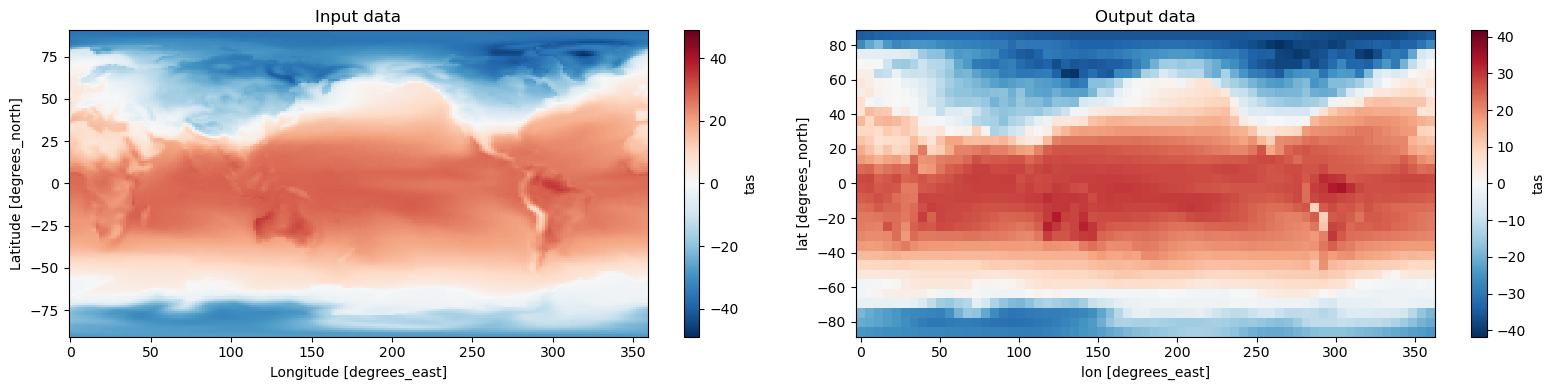

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ds.tas.isel(time=0).plot(ax=axes[0])
axes[0].set_title('Input data')

output.tas.isel(time=0).plot(ax=axes[1])
axes[1].set_title('Output data')

plt.tight_layout()

### Parallelism with Dask

> Nearly all existing xarray methods have been extended to work automatically with Dask arrays for parallelism
&mdash; <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html#using-dask-with-xarray</cite>


* Parallelized xarray methods include __indexing, computation, concatenating and grouped operations__
* __xCDAT inherently supports Dask parallelism__ for most APIs by building upon xarray methods
  * Dask arrays are loaded into memory only when absolutely required (e.g., decoding time, handling bounds)

<div style="text-align:center">
  <img src="https://docs.dask.org/en/stable/_images/dask_horizontal.svg" alt="Dask logo" style="display: inline-block; width:300px;">
</div>

#### How do I activate Dask with Xarray/xCDAT?

* The usual way to create a Dataset filled with Dask arrays is to load the data from a netCDF file or files.
* You can do this by supplying a `chunks` argument to open_dataset() or using the ``open_mfdataset``() function.
  * By default, ``open_mfdataset()`` will chunk each netCDF file into a single Dask array; again, supply the chunks argument to control the size of the resulting Dask arrays.

Source: <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html#reading-and-writing-data</cite>

In [16]:
filepath = "http://esgf.nci.org.au/thredds/dodsC/master/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/v20200605/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc"

# Use .chunk() to activate Dask arrays
# NOTE: `open_mfdataset()` automatically chunks by the number of files, which
# might not be optimal.
ds = xc.open_dataset(
    filepath,
    chunks={"time": 1}
)

In [17]:
ds.tas

<xarray.DataArray 'tas' (time: 1980, lat: 145, lon: 192)>
dask.array<open_dataset-6b8709561bfc5b835ce38cd244a2449atas, shape=(1980, 145, 192), dtype=float32, chunksize=(1, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]

#### Example of Parallelism in xCDAT 

In [18]:
tas_global = ds.spatial.average("tas", axis=["X", "Y"], weights="generate")["tas"]
tas_global

<xarray.DataArray 'tas' (time: 1980)>
dask.array<truediv, shape=(1980,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]

In [19]:
tas_departs = ds.temporal.departures("tas", freq="season")["tas"]
tas_departs

/home/vo13/miniconda3/envs/xcdat_dev_rise/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 166 times more chunks
  return self.array[key]


<xarray.DataArray 'tas' (time: 1980, lat: 145, lon: 192)>
dask.array<sub, shape=(1980, 145, 192), dtype=float64, chunksize=(1, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:        air_temperature
    long_name:            Near-Surface Air Temperature
    comment:              near-surface (usually, 2 meter) air temperature
    units:                K
    cell_methods:         area: time: mean
    cell_measures:        area: areacella
    history:              2020-06-05T04:06:10Z altered by CMOR: Treated scala...
    _ChunkSizes:          [  1 145 192]
    operation:            temporal_avg
    mode:                 departures
    freq:                 season
    weighted:             True
    dec_mode:             DJF
    drop_incomplete_djf:  False

#### When should I parallelize in Xarray/xCDAT?

Visit these pages for more guidance on Dask parallelism:

TODO
* Link to Xarray documentation
* Link to Dask documentation
* Link to our FAQs guidance

## Wrapping Things Up
* "Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer 
experience"
* xCDAT is an extension of xarray for climate data analysis on structured grids. 
* xCDAT aims to make analyzing climate data simple and robust with xarray

### We'd love your support!

* The xCDAT core team's mission is to provide a __maintainable and extensible package that serves the needs of the climate community in the long-term__. 
* Please check out the repository and give it a star to increase xCDAT's visibility!
* We're always open to contributions, whether through GitHub issues, pull requests, discussions, etc.


Repository: https://github.com/xCDAT/xcdat

### Resources

__If you comments or questions, reach out to us over email or the GitHub discussions forum!__

* GitHub repository: https://github.com/xCDAT/xcdat
* GitHub Discussions forum: https://github.com/xCDAT/xcdat/discussions
* Documentation: https://xcdat.readthedocs.io/en/latest/
* Anaconda page: https://anaconda.org/conda-forge/xcdat


